<a href="https://colab.research.google.com/github/PauliSu/testi/blob/master/VOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json
import requests as re

In [ ]:
# Luetaan data keskusmuistiin, data tulee muistikortilta joten on hitaampaa kuin SSD:ltä.
with open("vosdata.json", "r") as read_file:
    data = json.load(read_file)

JSONDecodeError: ignored

Vipusesta saa yo datan viimeisiltä vuosilta. URL:eja on erilaisia ja viimeinen url palauttaa datan.

In [ ]:
#url = 'http://api.vipunen.fi/api/resources'
#url = 'http://api.vipunen.fi/api/resources/ytl_arvosanat'
#url = 'http://api.vipunen.fi/api/resources/ytl_arvosanat/count'
url = 'http://api.vipunen.fi/api/resources/ytl_arvosanat/data'

In [ ]:
r = re.get(url)

In [ ]:
r.status_code

200

In [ ]:
r.json()

In [ ]:
len(r.json())

805071

Vipunen palauttaa datan json muodossa ja se on muutettava ns. dataframeksi.

In [ ]:
data = r.json()
df = pd.DataFrame.from_dict(data, orient='columns')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805071 entries, 0 to 805070
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   opiskelijaKoodi        805071 non-null  int64 
 1   tutkintokertaKoodi     805071 non-null  object
 2   tutkintokerta          805071 non-null  object
 3   lukioKoodi             805071 non-null  object
 4   lukio                  805071 non-null  object
 5   oppilaitostyyppiKoodi  176712 non-null  object
 6   oppilaitostyyppi       176712 non-null  object
 7   opetuskieliKoodi       805071 non-null  object
 8   opetuskieli            805071 non-null  object
 9   sukupuoliKoodi         805071 non-null  object
 10  sukupuoli              805048 non-null  object
 11  koeKoodi               805071 non-null  object
 12  koe                    805071 non-null  object
 13  arvosanaKoodi          805071 non-null  object
 14  arvosana               805071 non-null  object
 15  

Arvosanapisteet ovat string ja se pitää muuttaa numeroksi.

In [ ]:
df['arvosanapisteet'] = pd.to_numeric(df['arvosanapisteet'])

Tutkintokerrat: kevät ja syksy eivät ole vertailukelpoisia koska ne ovat eri tyyppisiä. Joten kevät voidaan ottaa erikseen.

In [ ]:
#df.tutkintokerta.str.contains('Syksy').unique()
dfkevat = df[df.tutkintokerta.str.contains('Kevät')]

In [ ]:
dfkevat.shape

(701193, 16)

Tutkintokertoja on viisi.

In [ ]:
dfkevat.tutkintokerta.unique()

array(['Kevät 2016', 'Kevät 2017', 'Kevät 2018', 'Kevät 2019',
       'Kevät 2020'], dtype=object)

Pitkä matematiikka on M

In [ ]:
dfm = dfkevat[dfkevat['koeKoodi'] == 'M']

In [ ]:
groups = dfm.groupby(['tutkintokertaKoodi','sukupuoli'])

In [ ]:
groups.mean().to_csv('ka.csv',sep=';')

LKM on suorittajien lukumäärä

In [ ]:
lkm = groups.count()

In [ ]:
lkm=lkm.reset_index()

In [ ]:
lkmMies=lkm[lkm['sukupuoli'] == 'Mies']['opiskelijaKoodi']

In [ ]:
lkmMies

0    5103
2    5151
4    5312
6    5574
8    5511
Name: opiskelijaKoodi, dtype: int64

In [ ]:
lkmNainen=lkm[lkm['sukupuoli']=='Nainen']['opiskelijaKoodi']

In [ ]:
lkmNainen

1    4784
3    4716
5    5201
7    5399
9    5949
Name: opiskelijaKoodi, dtype: int64

In [ ]:
lkm[lkm['sukupuoliKoodi']=='Mies']

,,opiskelijaKoodi,tutkintokerta,lukioKoodi,lukio,oppilaitostyyppiKoodi,oppilaitostyyppi,opetuskieliKoodi,opetuskieli,sukupuoliKoodi,koeKoodi,koe,arvosanaKoodi,arvosana,arvosanapisteet
tutkintokertaKoodi,sukupuoli,,,,,,,,,,,,,,


In [ ]:
lkm.columns

Index(['opiskelijaKoodi', 'tutkintokerta', 'lukioKoodi', 'lukio',
       'oppilaitostyyppiKoodi', 'oppilaitostyyppi', 'opetuskieliKoodi',
       'opetuskieli', 'sukupuoliKoodi', 'koeKoodi', 'koe', 'arvosanaKoodi',
       'arvosana', 'arvosanapisteet'],
      dtype='object')

In [ ]:
lkm.drop(['lukioKoodi', 'lukio',
       'oppilaitostyyppiKoodi', 'oppilaitostyyppi', 'opetuskieliKoodi',
       'opetuskieli', 'koeKoodi', 'koe', 'arvosanaKoodi',
       'arvosana', 'arvosanapisteet'], axis=1)

opiskelijaKoodi  tutkintokerta  sukupuoliKoodi
tutkintokertaKoodi sukupuoli                                                
2016K              Mies                  5103           5103            5103
                   Nainen                4784           4784            4784
2017K              Mies                  5151           5151            5151
                   Nainen                4716           4716            4716
2018K              Mies                  5312           5312            5312
                   Nainen                5201           5201            5201
2019K              Mies                  5574           5574            5574
                   Nainen                5399           5399            5399
2020K              Mies                  5511           5511            5511
                   Nainen                5949           5949            5949

In [ ]:
lkm['sukupuoli'] == 'Mies'

KeyError: ignored

In [ ]:
lkm[lkm['sukupuoliKoodi'] == 'Nainen']

,,opiskelijaKoodi,tutkintokerta,lukioKoodi,lukio,oppilaitostyyppiKoodi,oppilaitostyyppi,opetuskieliKoodi,opetuskieli,sukupuoliKoodi,koeKoodi,koe,arvosanaKoodi,arvosana,arvosanapisteet
tutkintokertaKoodi,sukupuoli,,,,,,,,,,,,,,


In [ ]:
ka = pd.read_csv('ka.csv',sep=';')

In [ ]:
ka = ka.drop(columns=['opiskelijaKoodi'])

Viidessä tutkintokerrassa on sekä naisia että miehiä.

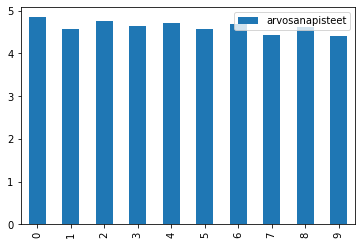

In [ ]:
ka.plot.bar()

In [ ]:
ka.T

,0,1,2,3,4,5,6,7,8,9
tutkintokertaKoodi,2016K,2016K,2017K,2017K,2018K,2018K,2019K,2019K,2020K,2020K
sukupuoli,Mies,Nainen,Mies,Nainen,Mies,Nainen,Mies,Nainen,Mies,Nainen
arvosanapisteet,4.84539,4.57316,4.76296,4.63147,4.70614,4.56393,4.68873,4.43471,4.61277,4.39889


In [ ]:
ka

,tutkintokertaKoodi,sukupuoli,arvosanapisteet
0,2016K,Mies,4.845385
1,2016K,Nainen,4.573161
2,2017K,Mies,4.762959
3,2017K,Nainen,4.631467
4,2018K,Mies,4.706137
5,2018K,Nainen,4.563930
6,2019K,Mies,4.688733
7,2019K,Nainen,4.434710
8,2020K,Mies,4.612774
9,2020K,Nainen,4.398891


Taulukon muoto pitää muuttaa erilaiseksi, että saamme kaksi vertailtavaa sarjaa sukupuolen mukaan.

In [ ]:
mies = ka[ka.sukupuoli == 'Mies']['arvosanapisteet'].reset_index()

In [ ]:
nainen = ka[ka.sukupuoli == 'Nainen']['arvosanapisteet'].reset_index()

In [ ]:
mies.columns = ['mies','mpisteet']

In [ ]:
nainen.columns = ['nainen','npisteet']

In [ ]:
jakso = ka.tutkintokertaKoodi.unique()

In [ ]:
jakso

0    2016K
1    2017K
2    2018K
3    2019K
4    2020K
dtype: object

In [ ]:
jakso = pd.Series(jakso)

In [ ]:
lkmMies=pd.Series(lkmMies).reset_index()

In [ ]:
lkmNainen=pd.Series(lkmNainen).reset_index()

In [138]:
lkmNainen.columns = ['nindex', 'nlkm']

In [139]:
lkmMies.columns = ['mindex', 'mlkm']

In [140]:
dfka = pd.DataFrame(pd.concat([jakso, mies, nainen, lkmMies, lkmNainen], axis=1))

In [145]:
dfka

,0,mpisteet,npisteet,mlkm,nlkm
0,2016K,4.845385,4.573161,5103,4784
1,2017K,4.762959,4.631467,5151,4716
2,2018K,4.706137,4.563930,5312,5201
3,2019K,4.688733,4.434710,5574,5399
4,2020K,4.612774,4.398891,5511,5949


In [144]:
dfka = dfka.drop(columns=['mies', 'nainen', 'mindex', 'nindex'])

In [148]:
dfka.to_csv('ka.csv', sep=';', index=False, decimal=',')

In [ ]:
dfka = dfka.drop(['mies','nainen'], axis=1)

Kuvassa on miesten ja naisten keskiarvopisteet yli tutkintokertojen.

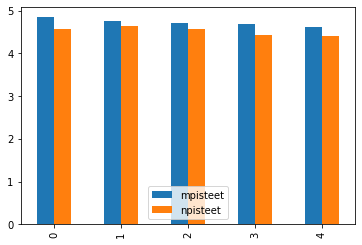

In [ ]:
dfka.plot.bar()

In [ ]:
dfka

,0,mpisteet,npisteet
0,2016K,4.845385,4.573161
1,2017K,4.762959,4.631467
2,2018K,4.706137,4.563930
3,2019K,4.688733,4.434710
4,2020K,4.612774,4.398891


In [ ]:
groups = df.groupby('tutkintokerta')

In [ ]:
#groups.arvosanapisteet.agg(['sum','mean','min', 'max']).plot.bar()
groups.arvosanapisteet.agg(['mean']).min()

mean    3.818824
dtype: float64

In [ ]:
!ls -lh

total 588M
drwxr-xr-x 1 root root 4.0K Mar  1 14:35 sample_data
-rw-r--r-- 1 root root 489M Mar  6 07:29 vosdata.json
-rw-r--r-- 1 root root  99M Mar  6 07:29 yodata.csv


In [ ]:
df_kevat.head(4)

NameError: ignored